In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\cubic_zirconia.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
df_N = df.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
df_N

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [6]:
dups = df_N.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 34


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
4756,4757,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,8145,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,8920,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,9819,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,10474,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,10501,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,12895,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,13548,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,13784,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [7]:
df.drop_duplicates(inplace=True) 

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


In [9]:
df_N.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
df_N.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [11]:
df_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
df_N.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [14]:
df_N.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [16]:
df_N.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [17]:
df_N.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [18]:
df_N.isna().values.sum()

697

In [19]:
df_N.shape

(26967, 10)

In [20]:
df_N.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [22]:
df_N.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [23]:
df_N.kurt()

carat      1.215364
depth      3.674431
table      1.582166
x         -0.657825
y        159.291616
z         87.006350
price      2.148617
dtype: float64

<AxesSubplot:>

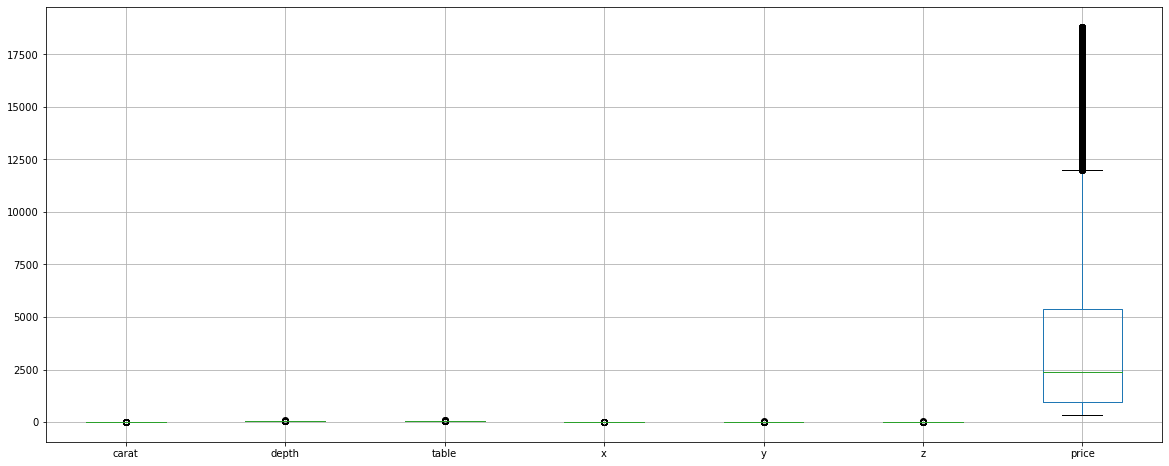

In [24]:
plt.figure(figsize = (20,8))
df_N.boxplot()

In [73]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

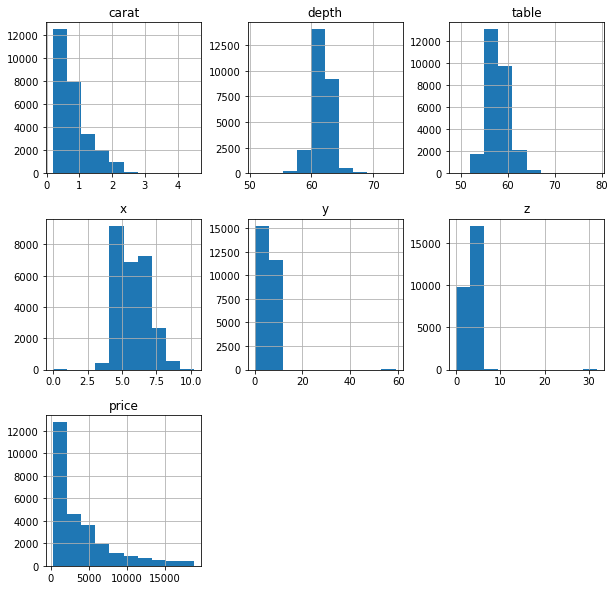

In [25]:
df_N.hist(figsize=(10,10))

In [4]:
# carat
df['carat'].max()-df['carat'].min()
Q1=df['carat'].quantile(q=0.25)
Q3=df['carat'].quantile(q=0.75)
print('Q1 of carat  is: ', Q1)
print('Q3 of carat  is: ', Q3)
print('IQR of carat is ', stats.iqr(df['carat']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in carat is: ', L_ol)
print('Threshold for upper outliers in carat is: ', U_ol)
print('No. of outliers in carat upper : ', df[df['carat']>2.0250000000000004]['carat'].count())
print('No. of outliers in carat lower : ', df[df['carat']<-0.5750000000000001]['carat'].count())

Q1 of carat  is:  0.4
Q3 of carat  is:  1.05
IQR of carat is  0.65
Threshold for lower outliers in carat is:  -0.5750000000000001
Threshold for upper outliers in carat is:  2.0250000000000004
No. of outliers in carat upper :  662
No. of outliers in carat lower :  0


In [5]:
df['depth'].max()-df['depth'].min()
Q1=df['depth'].quantile(q=0.25)
Q3=df['depth'].quantile(q=0.75)
print('Q1 of depth  is: ', Q1)
print('Q3 of depth  is: ', Q3)
print('IQR of depth is ', stats.iqr(df['depth']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in depth is: ', L_ol)
print('Threshold for upper outliers in depth is: ', U_ol)
print('No. of outliers in depth upper : ', df[df['depth']>64.75]['depth'].count())
print('No. of outliers in depth lower : ', df[df['depth']<58.75]['depth'].count())

Q1 of depth  is:  61.0
Q3 of depth  is:  62.5
IQR of depth is  nan
Threshold for lower outliers in depth is:  58.75
Threshold for upper outliers in depth is:  64.75
No. of outliers in depth upper :  487
No. of outliers in depth lower :  738


In [6]:
df['table'].max()-df['table'].min()
Q1=df['table'].quantile(q=0.25)
Q3=df['table'].quantile(q=0.75)
print('Q1 of table  is: ', Q1)
print('Q3 of table  is: ', Q3)
print('IQR of table is ', stats.iqr(df['table']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in table is: ', L_ol)
print('Threshold for upper outliers in table is: ', U_ol)
print('No. of outliers in table upper : ', df[df['table']>63.5]['table'].count())
print('No. of outliers in table lower : ', df[df['table']<51.5]['table'].count())

Q1 of table  is:  56.0
Q3 of table  is:  59.0
IQR of table is  3.0
Threshold for lower outliers in table is:  51.5
Threshold for upper outliers in table is:  63.5
No. of outliers in table upper :  310
No. of outliers in table lower :  8


In [7]:
df['x'].max()-df['x'].min()
Q1=df['x'].quantile(q=0.25)
Q3=df['x'].quantile(q=0.75)
print('Q1 of x  is: ', Q1)
print('Q3 of x  is: ', Q3)
print('IQR of x is ', stats.iqr(df['x']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in x is: ', L_ol)
print('Threshold for upper outliers in x is: ', U_ol)
print('No. of outliers in x upper : ', df[df['x']>9.309999999999999]['x'].count())
print('No. of outliers in x lower : ', df[df['x']<1.9500000000000002]['x'].count())

Q1 of x  is:  4.71
Q3 of x  is:  6.55
IQR of x is  1.8399999999999999
Threshold for lower outliers in x is:  1.9500000000000002
Threshold for upper outliers in x is:  9.309999999999999
No. of outliers in x upper :  12
No. of outliers in x lower :  3


In [8]:
df['y'].max()-df['y'].min()
Q1=df['y'].quantile(q=0.25)
Q3=df['y'].quantile(q=0.75)
print('Q1 of y  is: ', Q1)
print('Q3 of y  is: ', Q3)
print('IQR of y is ', stats.iqr(df['y']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in y is: ', L_ol)
print('Threshold for upper outliers in y is: ', U_ol)
print('No. of outliers in y upper : ', df[df['y']>9.285]['y'].count())
print('No. of outliers in y lower : ', df[df['y']<1.9649999999999999]['y'].count())

Q1 of y  is:  4.71
Q3 of y  is:  6.54
IQR of y is  1.83
Threshold for lower outliers in y is:  1.9649999999999999
Threshold for upper outliers in y is:  9.285
No. of outliers in y upper :  12
No. of outliers in y lower :  3


In [9]:
df['z'].max()-df['z'].min()
Q1=df['z'].quantile(q=0.25)
Q3=df['z'].quantile(q=0.75)
print('Q1 of z  is: ', Q1)
print('Q3 of z  is: ', Q3)
print('IQR of z is ', stats.iqr(df['z']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in z is: ', L_ol)
print('Threshold for upper outliers in z is: ', U_ol)
print('No. of outliers in z upper : ', df[df['z']>5.75]['z'].count())
print('No. of outliers in z lower : ', df[df['z']<1.1899999999999997]['z'].count())

Q1 of z  is:  2.9
Q3 of z  is:  4.04
IQR of z is  1.1400000000000001
Threshold for lower outliers in z is:  1.1899999999999997
Threshold for upper outliers in z is:  5.75
No. of outliers in z upper :  13
No. of outliers in z lower :  10


In [10]:
df['price'].max()-df['price'].min()
Q1=df['price'].quantile(q=0.25)
Q3=df['price'].quantile(q=0.75)
print('Q1 of price  is: ', Q1)
print('Q3 of price  is: ', Q3)
print('IQR of price is ', stats.iqr(df['price']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in price is: ', L_ol)
print('Threshold for upper outliers in price is: ', U_ol)
print('No. of outliers in price upper : ', df[df['price']>11982.5]['price'].count())
print('No. of outliers in price lower : ', df[df['price']<-5677.5]['price'].count())

Q1 of price  is:  945.0
Q3 of price  is:  5360.0
IQR of price is  4415.0
Threshold for lower outliers in price is:  -5677.5
Threshold for upper outliers in price is:  11982.5
No. of outliers in price upper :  1779
No. of outliers in price lower :  0


<AxesSubplot:xlabel='cut', ylabel='count'>

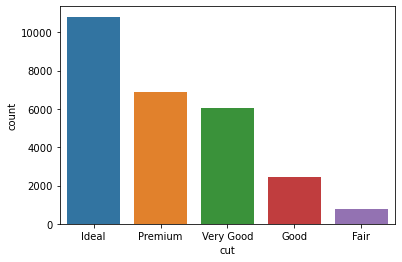

In [26]:
sns.countplot(data = df, x = 'cut')

In [27]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

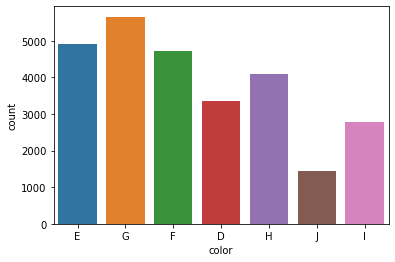

In [28]:
sns.countplot(data = df, x = 'color')

In [29]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='count'>

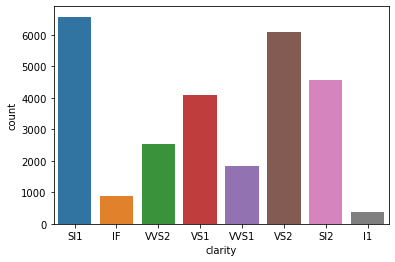

In [30]:
sns.countplot(data = df, x = 'clarity')

In [31]:
df['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [32]:
df.cut.nunique()

5

In [33]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [34]:
df.color.nunique()

7

In [35]:
df.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [36]:
df.clarity.nunique()

8

In [37]:
df.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

<AxesSubplot:xlabel='cut', ylabel='price'>

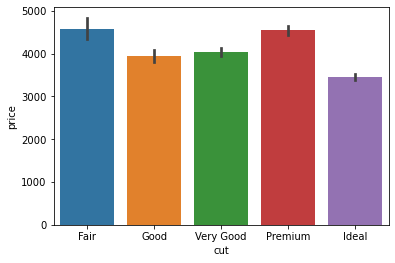

In [38]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

In [39]:
df.groupby(by='price').cut.nunique().sort_values(ascending = False)

price
829     5
4295    5
3323    5
2657    5
798     5
       ..
8015    1
8022    1
8025    1
8029    1
5527    1
Name: cut, Length: 8742, dtype: int64

In [40]:
df[['cut','price']].sort_values(by='price', ascending = False).head(5)

,cut,price
2590,Very Good,18818
12687,Ideal,18804
2229,Premium,18795
17892,Premium,18795
16007,Premium,18791


In [41]:
df["price"].sum()

106236985

<AxesSubplot:xlabel='color', ylabel='price'>

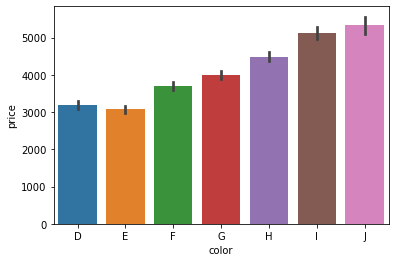

In [42]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

In [43]:
df[['color','price']].sort_values(by='price', ascending = False).head(5)

,color,price
2590,G,18818
12687,G,18804
2229,H,18795
17892,I,18795
16007,F,18791


<AxesSubplot:xlabel='clarity', ylabel='price'>

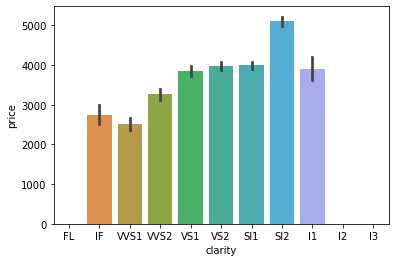

In [44]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [45]:
df[['clarity','price']].sort_values(by='price', ascending = False).head(5)

,clarity,price
2590,SI1,18818
12687,SI2,18804
2229,SI1,18795
17892,VS1,18795
16007,VS2,18791


In [46]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


<AxesSubplot:xlabel='cut'>

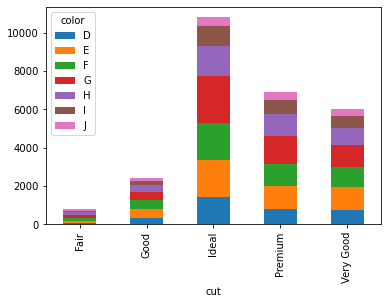

In [47]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

In [48]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


<AxesSubplot:xlabel='cut'>

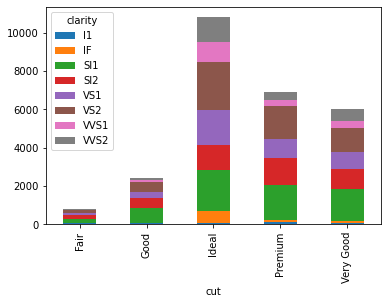

In [49]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

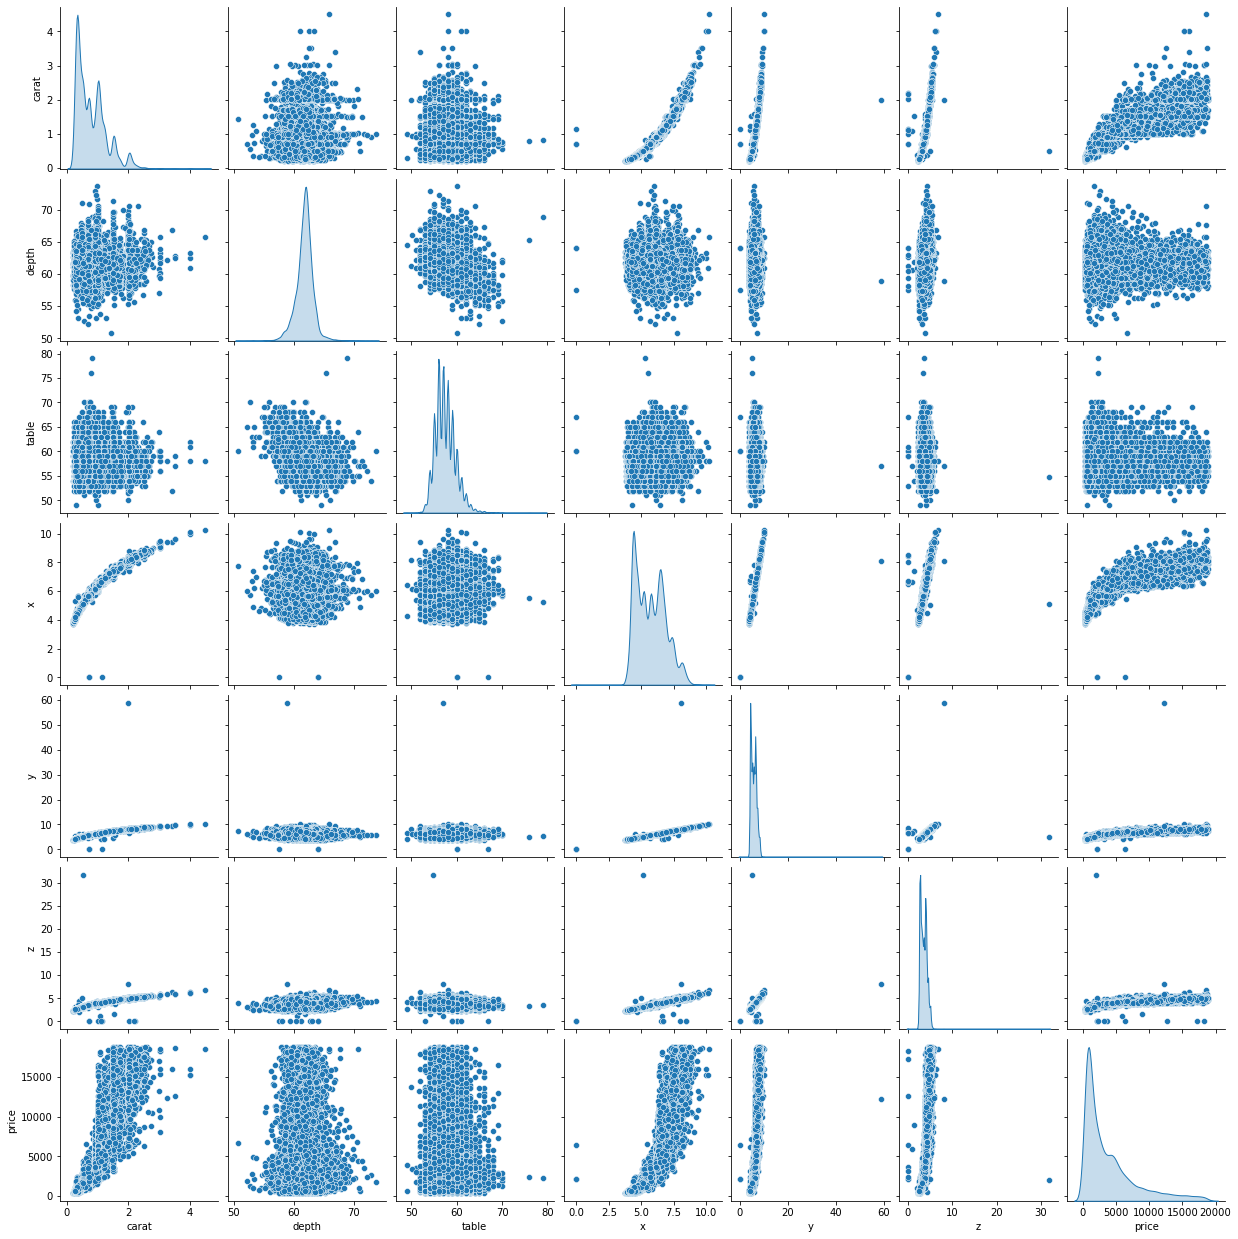

In [26]:
sns.pairplot(df_N, diag_kind='kde')  
plt.show()

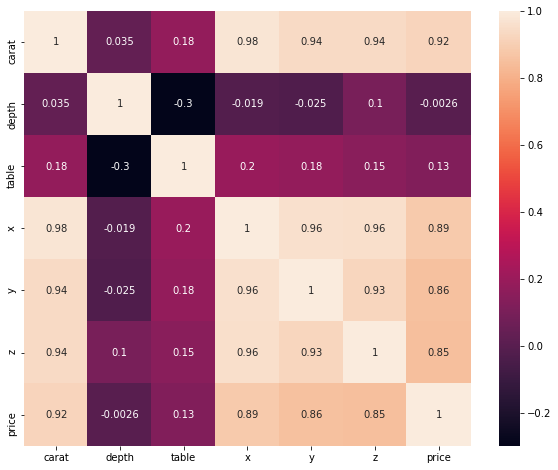

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(correl, annot=True)
plt.show()

In [27]:
correl = df_N.corr()
correl

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


In [29]:
check_z=df_N[df_N['z']==0.]
print(check_z)

       carat      cut color clarity  depth  table     x     y    z  price
5821    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6034    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
6215    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
10827   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12498   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12689   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17506   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18194   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23758   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383


In [30]:
check_x=df_N[df_N['x']==0.]
print(check_x)

       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381


In [31]:
check_y=df_N[df_N['y']==0.]
print(check_y)

       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381


In [32]:
df_N.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [33]:
df_N[df_N.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
6215   x    0
       y    0
       z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

In [35]:
df_N.loc[((df_N['x'] == 0) | (df_N['y'] == 0) | (df_N['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [36]:
df_N.drop(df_N[((df_N['x'] == 0) | (df_N['y'] == 0) | (df_N['z'] == 0))].index, inplace=True)

In [37]:
df_N[df_N.isin([0])].stack(0)

Series([], dtype: object)

In [39]:
for column in df_N.columns:
    if df_N[column].dtype != 'object':
        median = df_N[column].median()
        df_N[column] =df_N[column].fillna(median)    
        
df_N.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [40]:
df_N.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [43]:
lrcarat,urcarat=remove_outlier(df_N['carat'])
df_N['carat']=np.where(df_N['carat']>urcarat,urcarat,df_N['carat'])
df_N['carat']=np.where(df_N['carat']<lrcarat,lrcarat,df_N['carat'])

In [44]:
lrdepth,urdepth=remove_outlier(df_N['depth'])
df_N['depth']=np.where(df_N['depth']>urdepth,urdepth,df_N['depth'])
df_N['depth']=np.where(df_N['depth']<lrdepth,lrdepth,df_N['depth'])

In [45]:
lrtable,urtable=remove_outlier(df_N['table'])
df_N['table']=np.where(df_N['table']>urtable,urtable,df_N['table'])
df_N['table']=np.where(df_N['table']<lrtable,lrtable,df_N['table'])

In [46]:
lrx,urx=remove_outlier(df_N['x'])
df_N['x']=np.where(df_N['x']>urx,urx,df_N['x'])
df_N['x']=np.where(df_N['x']<lrx,lrx,df_N['x'])

In [55]:
lry,ury=remove_outlier(df_N['y'])
df_N['y']=np.where(df_N['y']>ury,ury,df_N['y'])
df_N['y']=np.where(df_N['y']<lry,lry,df_N['y'])

In [47]:
lrz,urz=remove_outlier(df_N['z'])
df_N['z']=np.where(df_N['z']>urz,urz,df_N['z'])
df_N['z']=np.where(df_N['z']<lrz,lrz,df_N['z'])

In [48]:
lrprice,urprice=remove_outlier(df_N['price'])
df_N['price']=np.where(df_N['price']>urprice,urprice,df_N['price'])
df_N['price']=np.where(df_N['price']<lrprice,lrprice,df_N['price'])

<AxesSubplot:>

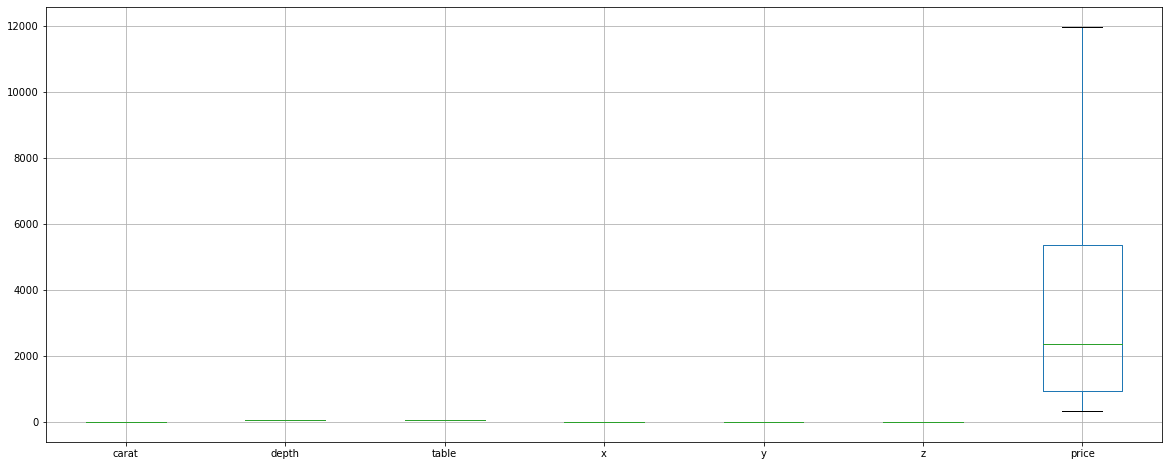

In [56]:
plt.figure(figsize = (20,8))
df_N.boxplot()

In [50]:
correl = df_N.corr()
correl

,carat,depth,table,x,y,z,price
carat,1.000000,0.029844,0.187400,0.982882,0.947430,0.980877,0.936743
depth,0.029844,1.000000,-0.289484,-0.019531,-0.025144,0.095090,-0.000544
table,0.187400,-0.289484,1.000000,0.199932,0.186386,0.160748,0.138027
x,0.982882,-0.019531,0.199932,1.000000,0.962556,0.990898,0.913356
y,0.947430,-0.025144,0.186386,0.962556,1.000000,0.956623,0.882518
z,0.980877,0.095090,0.160748,0.990898,0.956623,1.000000,0.908588
price,0.936743,-0.000544,0.138027,0.913356,0.882518,0.908588,1.000000


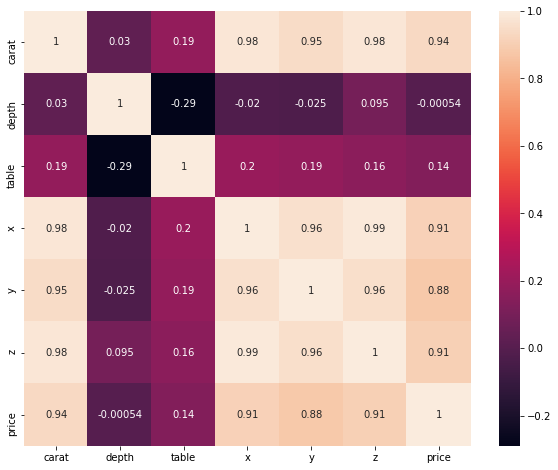

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(correl, annot=True)
plt.show()

In [52]:
data = pd.get_dummies(df_N, columns=['cut','color','clarity'],drop_first=True)

In [53]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
data

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
df_N.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [133]:
df_N.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26958.0,0.793418,0.462311,0.20,0.4000,0.70,1.05,2.02500
depth,26958.0,61.750608,1.218580,59.00,61.1000,61.80,62.50,64.60000
table,26958.0,57.435084,2.156693,51.50,56.0000,57.00,59.00,63.50000
x,26958.0,5.729937,1.126134,3.73,4.7100,5.69,6.55,9.31000
y,26958.0,5.731840,1.118090,3.71,4.7125,5.70,6.54,9.28125
z,26958.0,3.538045,0.696074,1.19,2.9000,3.52,4.04,5.75000
price,26958.0,3736.761258,3469.518163,326.00,945.0000,2375.00,5358.00,11977.50000
cut_Good,26958.0,0.090474,0.286865,0.00,0.0000,0.00,0.00,1.00000
cut_Ideal,26958.0,0.401217,0.490154,0.00,0.0000,0.00,1.00,1.00000
cut_Premium,26958.0,0.255694,0.436259,0.00,0.0000,0.00,1.00,1.00000


In [99]:
X = df_N.drop('price', axis=1)
y = df_N[['price']]

In [100]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [101]:
X.shape

(26958, 23)

In [102]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [104]:
# Linear Regression Model

In [105]:
reg_model = LinearRegression()

In [106]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [107]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for carat is 9274.418770612465
The coefficient for depth is 16.17705569591578
The coefficient for table is -24.017788242429333
The coefficient for x is -1089.2731779375138
The coefficient for y is 1050.1706420006685
The coefficient for z is -780.0003446872904
The coefficient for cut_Good is 378.32570960439017
The coefficient for cut_Ideal is 612.7895579068438
The coefficient for cut_Premium is 597.5694791430349
The coefficient for cut_Very Good is 506.2854463752649
The coefficient for color_E is -189.31335692159408
The coefficient for color_F is -252.197110367515
The coefficient for color_G is -405.231787897506
The coefficient for color_H is -835.5282250394458
The coefficient for color_I is -1303.3600812840275
The coefficient for color_J is -1885.2683663199698
The coefficient for clarity_IF is 4022.356296209366
The coefficient for clarity_SI1 is 2570.793016410323
The coefficient for clarity_SI2 is 1728.389700271256
The coefficient for clarity_VS1 is 3371.8652955738407
T

In [108]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3147.283402498099


In [109]:
# R square

In [110]:
reg_model.score(X_train, y_train)

0.9419557931252712

In [111]:
reg_model.score(X_test, y_test)

0.9381643998102492

In [112]:
#RMSE

In [113]:
predicted_train=reg_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

832.4206056108892

In [114]:
predicted_test=reg_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

870.953429935481

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [117]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 124.32595405062301
depth ---> 1407.6352441517224
table ---> 1002.8676766903022
x ---> 12004.212489729716
y ---> 11533.491914672948
z ---> 3442.374035538099
cut_Good ---> 4.5067464355335405
cut_Ideal ---> 18.17410430875144
cut_Premium ---> 10.884031423492264
cut_Very Good ---> 10.062010659328736
color_E ---> 2.4798756756513525


In [118]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,0.71,63.3,59.0,5.52,5.61,3.52,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2768.0
8882,0.30,62.9,58.0,4.27,4.31,2.70,0,0,0,1,...,0,0,0,0,0,0,1,0,0,544.0
22763,0.70,63.9,59.0,5.64,5.60,3.59,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2351.0
6643,0.36,60.2,56.0,4.65,4.62,2.79,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1080.0
18701,1.66,63.0,57.0,7.45,7.50,4.71,0,0,0,1,...,1,0,0,1,0,0,0,0,0,8901.0


In [119]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [120]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [121]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [122]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -3147.283402
carat            9274.418771
depth              16.177056
table             -24.017788
x               -1089.273178
y                1050.170642
z                -780.000345
cut_Good          378.325710
cut_Ideal         612.789558
cut_Premium       597.569479
cut_Very_Good     506.285446
color_E          -189.313357
color_F          -252.197110
color_G          -405.231788
color_H          -835.528225
color_I         -1303.360081
color_J         -1885.268366
clarity_IF       4022.356296
clarity_SI1      2570.793016
clarity_SI2      1728.389700
clarity_VS1      3371.865296
clarity_VS2      3081.934753
clarity_VVS1     3790.244221
clarity_VVS2     3747.155103
dtype: float64

In [123]:
mse = np.mean((reg_model.predict(X_test)-y_test)**2)

In [124]:
import math

math.sqrt(mse)

870.95342993548

In [125]:
reg_model.score(X_test, y_test)

0.9381643998102492

In [126]:
y_pred = reg_model.predict(X_test)

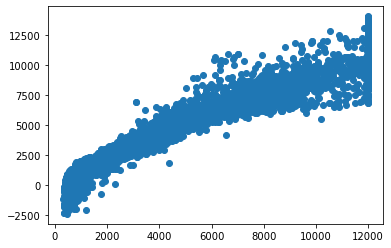

In [127]:
plt.scatter(y_test['price'], y_pred)

In [128]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -3147.283402
carat            9274.418771
depth              16.177056
table             -24.017788
x               -1089.273178
y                1050.170642
z                -780.000345
cut_Good          378.325710
cut_Ideal         612.789558
cut_Premium       597.569479
cut_Very_Good     506.285446
color_E          -189.313357
color_F          -252.197110
color_G          -405.231788
color_H          -835.528225
color_I         -1303.360081
color_J         -1885.268366
clarity_IF       4022.356296
clarity_SI1      2570.793016
clarity_SI2      1728.389700
clarity_VS1      3371.865296
clarity_VS2      3081.934753
clarity_VVS1     3790.244221
clarity_VVS2     3747.155103
dtype: float64

In [129]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:55:16   Log-Likelihood:            -1.5366e+05
No. Observations:               18870   AIC:                         3.074e+05
Df Residuals:                   18846   BIC:                         3.076e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3147.2834    752.541     -4.182

In [127]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [128]:
data_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
26809,0.443495,0.109928,-0.204081,0.559065,0.580741,0.572231,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.122708
10087,0.024729,0.038193,-1.100465,0.212920,0.254370,0.237888,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.082442
22817,-0.812804,0.181664,-0.652273,-0.852144,-0.793452,-0.793005,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.689067
21676,0.045667,0.396869,-0.652273,0.204044,0.245781,0.265750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.272740
14846,0.694754,0.683810,-0.204081,0.816456,0.812636,0.892644,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.642930


In [130]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3147.28) * Intercept + (9274.42) * carat + (16.18) * depth + (-24.02) * table + (-1089.27) * x + (1050.17) * y + (-780.0) * z + (378.33) * cut_Good + (612.79) * cut_Ideal + (597.57) * cut_Premium + (506.29) * cut_Very_Good + (-189.31) * color_E + (-252.2) * color_F + (-405.23) * color_G + (-835.53) * color_H + (-1303.36) * color_I + (-1885.27) * color_J + (4022.36) * clarity_IF + (2570.79) * clarity_SI1 + (1728.39) * clarity_SI2 + (3371.87) * clarity_VS1 + (3081.93) * clarity_VS2 + (3790.24) * clarity_VVS1 + (3747.16) * clarity_VVS2 + 